# Importing the libraries

In [293]:
import nltk 
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

# Download the twitter dataset from ntlk

In [294]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [295]:
all_positive_tweets=twitter_samples.strings('positive_tweets.json')
all_negative_tweets=twitter_samples.strings('negative_tweets.json')

In [296]:
print('Number of positive tweets:',len(all_positive_tweets))
print('Number of negative tweets:',len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets: 5000
Number of negative tweets: 5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


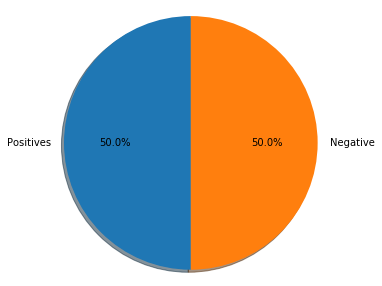

In [297]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

The above pie chart shows that there are equal number of statements with positive and negative sentiments

In [298]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@IaneboyIester into a pity party so :-)
i wanna see paper towns w/ @milesfloresss :(


In [299]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

# Downloading the stopwords

The stopwords, hyperlinks, punctuations contain no information and hence are removed from the dataset before processing. Also, each word is converted to its root word using stem function to avoid redundancy

In [300]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Preprocess function

In [301]:

def preprocess(t):
    processed_tweets=[]
    for tweet in t:

        # remove old style retweet text "RT"
        tweet = re.sub(r'^RT[\s]+', '', tweet)

        # remove hyperlinks
        tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

        # remove hashtags
        # only removing the hash # sign from the word
        tweet = re.sub(r'#', '', tweet)
        # instantiate tokenizer class
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                                       reduce_len=True)

        # tokenize tweets
        tweet = tokenizer.tokenize(tweet)

        stopwords_english=stopwords.words('english')
        tweets_clean = []

        for word in tweet: # Go through every word in your tokens list
            if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
                tweets_clean.append(word)

            # Instantiate stemming class
        stemmer = PorterStemmer() 

        # Create an empty list to store the stems
        tweets_stem = [] 

        for word in tweets_clean:
            stem_word = stemmer.stem(word)  # stemming word
            tweets_stem.append(stem_word)  # append to the list

        tweet=tweets_stem
        processed_tweets.append(tweet)
    return processed_tweets


Preprocess all the positive and negative tweets before working on it

In [302]:
ptweets=preprocess(all_positive_tweets)
ntweets=preprocess(all_negative_tweets)

# Labelling the dataset 

The dataset is given 1 (Positive tweets) and 0 (Negative tweets) as labels

In [303]:
import numpy as np
labels=np.append(np.ones((len(all_positive_tweets))),np.zeros((len(all_negative_tweets))))

The positive tweets and negative tweets are clubbed together to get a single array of tweets

In [304]:
tweets=ptweets+ntweets

# Making the frequency array

In [305]:
def build_freqs(tweets,ys):
    yslist=np.squeeze(ys).tolist()
    freqs={}
    for y,tweet in zip(yslist,tweets):
        for word in tweet:
            pair=(word,y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair]=1
    return freqs

In [306]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13075


In [307]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

C:\Users\Dell\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Dell\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56850 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Dell\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Dell\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128556 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\Dell\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Dell\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56845 missing from current fon

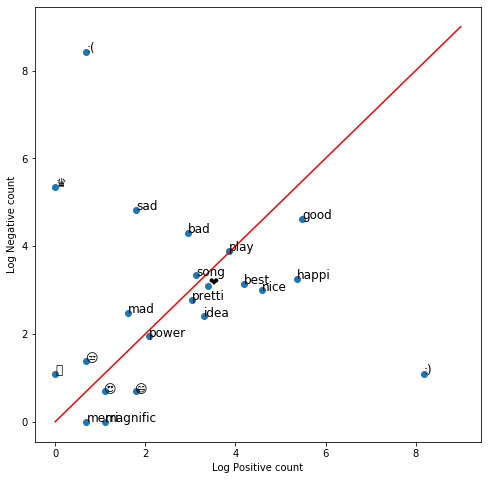

In [308]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

# Extracting the features using the freqs array

In [309]:
def extract_features(tweet, freqs):
    # process_tweet tokenizes, stems, and removes stopwords
    #word_l = process_tweet(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in tweet:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [310]:
X = np.zeros((len(tweets), 3))
for i in range(len(tweets)):
    X[i, :]= extract_features(tweets[i], freqs)


In [311]:
Y=labels

In [312]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [313]:
Y=Y.reshape(10000,1)

In [314]:
dataset=np.append(X, Y, axis=1)

In [315]:
print(dataset)

[[1.000e+00 3.764e+03 7.200e+01 1.000e+00]
 [1.000e+00 4.464e+03 5.170e+02 1.000e+00]
 [1.000e+00 3.759e+03 1.600e+02 1.000e+00]
 ...
 [1.000e+00 3.400e+01 4.640e+03 0.000e+00]
 [1.000e+00 1.000e+01 4.585e+03 0.000e+00]
 [1.000e+00 1.160e+02 5.820e+02 0.000e+00]]


So, in the dataset, first 5000 samples have positive sentiment tweets and the other 5000 contain negative sentiment tweets. Shuffling the dataset row-wise helps to predict the data better as it contains no bias then

In [316]:
np.random.shuffle(dataset)

In [317]:
dataset

array([[1.000e+00, 3.677e+03, 2.020e+02, 1.000e+00],
       [1.000e+00, 8.050e+02, 2.390e+02, 1.000e+00],
       [1.000e+00, 1.167e+03, 6.870e+02, 1.000e+00],
       ...,
       [1.000e+00, 3.800e+01, 4.662e+03, 0.000e+00],
       [1.000e+00, 3.700e+02, 5.062e+03, 0.000e+00],
       [1.000e+00, 3.960e+02, 5.104e+03, 0.000e+00]])

In [318]:
X=dataset[:,0:3]

In [319]:
X

array([[1.000e+00, 3.677e+03, 2.020e+02],
       [1.000e+00, 8.050e+02, 2.390e+02],
       [1.000e+00, 1.167e+03, 6.870e+02],
       ...,
       [1.000e+00, 3.800e+01, 4.662e+03],
       [1.000e+00, 3.700e+02, 5.062e+03],
       [1.000e+00, 3.960e+02, 5.104e+03]])

In [320]:
Y=dataset[:,3]

In [321]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

# Training the dataset 

In [322]:
from sklearn import model_selection

In [323]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=6)

In [324]:
X_train.shape

(8000, 3)

In [325]:
y_train.shape

(8000,)

In [326]:
model.fit(X_train,y_train)

C:\Users\Dell\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [327]:
y_preds=model.predict(X_test)

In [328]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [329]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       973
         1.0       0.99      0.99      0.99      1027

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



array([[ 967,    6],
       [   6, 1021]], dtype=int64)

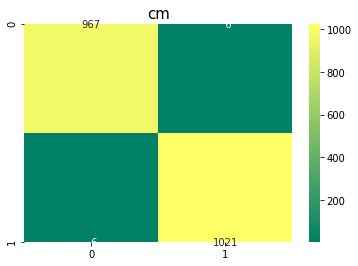

In [330]:
import seaborn as sns

cm=confusion_matrix(y_test,y_preds)
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm

In [331]:
print("The accuracy score of the above model is:",accuracy_score(y_test,y_preds),"%")

The accuracy score of the above model is: 0.994 %


In [332]:
def pred(a):
    a=preprocess([a])
    a=extract_features(a[0],freqs)
    ans=model.predict(a)
    if ans==0:
        print("This statement contains Negative Sentiment.")
    else:
        print("This statement contains Postive Sentiment.")

In [333]:
pred("This is hateful")

This statement contains Negative Sentiment.


In [334]:
pred("This is amazing")

This statement contains Postive Sentiment.
